In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm

#### The tqdm library is used to display progress bars for loops and other iterative processes. Basically, tqdm module helps in visualizing the progress of long-running operations

In [3]:
files=os.listdir("cropped_images")
files

['chris_evans',
 'chris_hemsworth',
 'mark_ruffalo',
 'robert_downey_jr',
 'scarlett_johansson']

#### These are the various labels in the image dataset, which consist of faces of various celebrities

In [4]:
image_array=[]  # it's a list later i will convert it to array
label_array=[]
path="cropped_images"


# List all subfolders in the main folder
files = os.listdir(path)

# Loop through each sub-folder
for i in range(len(files)):
    subfolder_path = os.path.join(path, files[i])
    
    # Ensure the current path is a directory
    if os.path.isdir(subfolder_path):
        # List all files in the subfolder
        file_sub = os.listdir(subfolder_path)
        
        for k in tqdm(range(len(file_sub))):
            try:
                # Construct the full path of the image
                img_path = os.path.join(subfolder_path, file_sub[k])
                
                # Read the image
                img = cv2.imread(img_path)
                
                # Ensure the image is read correctly
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (96, 96))
                    
                    # Append the image and label to respective lists
                    image_array.append(img)
                    label_array.append(i)
            except Exception as e:
                print(f"Error processing file {img_path}: {e}")
                pass



  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 54/54 [00:00<00:00, 85.39it/s] 


##### Normalizing pixel values of image array to the range [0, 1]

In [5]:
image_array=np.array(image_array)/255.0
label_array=np.array(label_array)

In [54]:
label_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [6]:
image_array

array([[[[0.12156863, 0.09411765, 0.07843137],
         [0.14117647, 0.10588235, 0.09411765],
         [0.11764706, 0.08235294, 0.07058824],
         ...,
         [0.00784314, 0.01568627, 0.01568627],
         [0.35294118, 0.37254902, 0.38039216],
         [0.41568627, 0.44313725, 0.45098039]],

        [[0.08235294, 0.06666667, 0.04313725],
         [0.14509804, 0.12156863, 0.09803922],
         [0.10196078, 0.07843137, 0.05490196],
         ...,
         [0.01568627, 0.01960784, 0.01960784],
         [0.29803922, 0.30196078, 0.30588235],
         [0.42352941, 0.43921569, 0.44313725]],

        [[0.09803922, 0.08235294, 0.05882353],
         [0.1372549 , 0.11764706, 0.09411765],
         [0.09411765, 0.0745098 , 0.05098039],
         ...,
         [0.        , 0.        , 0.        ],
         [0.2627451 , 0.2627451 , 0.26666667],
         [0.41568627, 0.43137255, 0.43529412]],

        ...,

        [[0.42352941, 0.45490196, 0.4627451 ],
         [0.42352941, 0.45490196, 0.4627451 ]

##### Divide the dataset into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(image_array,label_array,test_size=0.15)

### Designing a neural network model 

In [8]:
from keras import layers,callbacks,utils,applications,optimizers
from keras.models import Sequential,Model,load_model

layers: Contains various types of layers (e.g., Dense, Conv2D, LSTM) used to construct the architecture of neural networks.

callbacks: Provides callback functions that can be applied during training to perform tasks such as saving model checkpoints, adjusting learning rates, or stopping training early based on certain conditions.

utils: Includes utility functions for common tasks like data preprocessing

applications: Offers pre-trained deep learning models that can be used for transfer learning or fine-tuning on specific tasks.

optimizers: Contains optimization algorithms (e.g., SGD, Adam, RMSprop) used to train neural networks by minimizing the loss function.

importing Sequential, Model, and load_model from keras.models allows you to create and work with Sequential and functional API models, as well as load previously saved models.

In [9]:
model=Sequential()
# I will use MobileNetV2 as an pretrained model 
pretrained_model=tf.keras.applications.EfficientNetB0(input_shape=(96,96,3),include_top=False,
                                         weights="imagenet")
model.add(pretrained_model)
model.add(layers.GlobalAveragePooling2D())
# add dropout to increase accuracy by not overfitting
model.add(layers.Dropout(0.3))
# add dense layer as final output
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 3, 3, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


I will use MobileNetV2 as an pretrained model 

MobileNetV2 is suitable for face recognition primarily due to its efficiency, effectiveness, and ability to capture relevant features:

Efficiency: MobileNetV2 is lightweight and designed for mobile and embedded deployment, making it suitable for real-time face recognition applications on devices with limited computational resources.

Feature extraction: The architecture of MobileNetV2 includes depth-wise separable convolutions, which efficiently capture important features from images, including facial shapes, textures, and key landmarks. These features are essential for accurately recognizing faces.

Pre-trained on large datasets: MobileNetV2 is often pre-trained on large-scale image datasets such as ImageNet, enabling it to learn generalizable features from diverse images. This pre-training can boost performance on face recognition tasks when fine-tuned on specific face datasets.

In [32]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [30]:
ckp_path="trained_model/model"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=ckp_path,
                                                   monitor="val_mae",
                                                   mode="auto",
                                                   save_best_only=True,
                                                   save_weights_only=True)

This is to set up a callback in TensorFlow/Keras that saves the model's weights during training, specifically saving only the weights that result in the best performance on the validation set.

In [31]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.9,monitor="val_mae",
                                             mode="auto",cooldown=0,
                                             patience=5,verbose=1,min_lr=1e-6)

The ReduceLROnPlateau callback dynamically reduces the learning rate when a monitored metric (in this case, "val_mae" - validation mean absolute error) has stopped improving, aiming to fine-tune the model's performance.

factor: Factor by which the learning rate will be reduced when triggered. Here, it's set to 0.9, meaning the LR will be reduced by 10%.                                               
monitor: The metric to monitor for learning rate reduction. In this case, it's "val_mae" (validation mean absolute error).                              
mode: Determines the direction of monitored metric improvement to trigger LR reduction. "auto" infers direction from the monitored metric.                    
cooldown: Number of epochs to wait before resuming normal operation after LR has been reduced.                                                             
patience: Number of epochs with no improvement after which LR will be reduced.                                                                              
verbose: Verbosity mode. When set to 1, it displays a message when the LR is reduced.                                                                        
min_lr: Lower bound for the learning rate. If the current LR is less than or equal to this value, it won't be further reduced.

In [33]:
EPOCHS=300
BATCH_SIZE=64

history=model.fit(X_train,
                 Y_train,
                 validation_data=(X_test,Y_test),
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 callbacks=[model_checkpoint,reduce_lr]
                 
                 )

Epoch 1/300
4/4 [==============================] - 67s 6s/step - loss: 0.2112 - mae: 0.3422 - val_loss: 2.4470 - val_mae: 1.2581 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - 16s 4s/step - loss: 0.1625 - mae: 0.3196 - val_loss: 2.3726 - val_mae: 1.2398 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - 14s 3s/step - loss: 0.1163 - mae: 0.2756 - val_loss: 240010.6406 - val_mae: 434.5233 - lr: 0.0010
Epoch 4/300
4/4 [==============================] - 13s 3s/step - loss: 0.0821 - mae: 0.2239 - val_loss: 30881.5449 - val_mae: 158.5472 - lr: 0.0010
Epoch 5/300
4/4 [==============================] - 14s 3s/step - loss: 0.0833 - mae: 0.2286 - val_loss: 19662.1250 - val_mae: 131.2517 - lr: 0.0010
Epoch 6/300
4/4 [==============================] - 13s 3s/step - loss: 0.0537 - mae: 0.1827 - val_loss: 103235.5625 - val_mae: 318.0026 - lr: 0.0010
Epoch 7/300
4/4 [==============================] - ETA: 0s - loss: 0.0541 - mae: 0.1757
Epoch 7: ReduceLROnPlateau reducin

## Model Accuracy Evaluation

In [34]:
prediction_val=model.predict(X_test,batch_size=BATCH_SIZE)

1/1 [==============================] - 5s 5s/step


In [40]:
prediction_val

array([[ 0.9992039 ],
       [ 2.0250576 ],
       [ 3.9787397 ],
       [ 0.01189677],
       [ 1.9842628 ],
       [ 0.7959703 ],
       [ 3.8603616 ],
       [ 1.0821782 ],
       [ 2.9491384 ],
       [ 2.9976563 ],
       [ 1.9740058 ],
       [ 2.0166097 ],
       [ 0.98228365],
       [ 0.96486896],
       [ 4.0522046 ],
       [ 1.7939097 ],
       [ 1.6284648 ],
       [ 3.145037  ],
       [ 1.8398322 ],
       [ 3.8862643 ],
       [ 2.654676  ],
       [ 0.08268476],
       [ 2.8475668 ],
       [ 1.0808145 ],
       [ 0.04729516],
       [ 3.2000763 ],
       [ 1.090685  ],
       [ 2.909099  ],
       [ 0.95310587],
       [ 2.0037613 ],
       [ 1.1775955 ],
       [ 2.004961  ],
       [ 0.97311836],
       [ 2.952847  ],
       [ 0.9546268 ],
       [ 0.9753158 ],
       [ 3.5908651 ],
       [ 1.883814  ],
       [ 4.0042753 ],
       [ 1.9699363 ],
       [-0.03087337],
       [ 1.2333392 ]], dtype=float32)

In [41]:
Y_test

array([0, 2, 4, 0, 2, 1, 4, 1, 3, 3, 3, 2, 3, 1, 4, 2, 2, 3, 2, 4, 3, 0,
       3, 1, 0, 4, 1, 3, 1, 2, 1, 2, 1, 3, 1, 1, 4, 2, 4, 2, 0, 1])

In [42]:
np.round(prediction_val)

array([[ 1.],
       [ 2.],
       [ 4.],
       [ 0.],
       [ 2.],
       [ 1.],
       [ 4.],
       [ 1.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 4.],
       [ 3.],
       [ 0.],
       [ 3.],
       [ 1.],
       [ 0.],
       [ 3.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 4.],
       [ 2.],
       [ 4.],
       [ 2.],
       [-0.],
       [ 1.]], dtype=float32)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(Y_test,np.round(prediction_val))

0.9047619047619048

##### I got an amazing accuracy of 90%.

## LET'S DO SOME PREDICTIONS

In [130]:

testing=cv2.imread('cropped_images\mark_ruffalo\mark_ruffalo1.png')
     

In [131]:
image_array=np.array(testing)/255.0

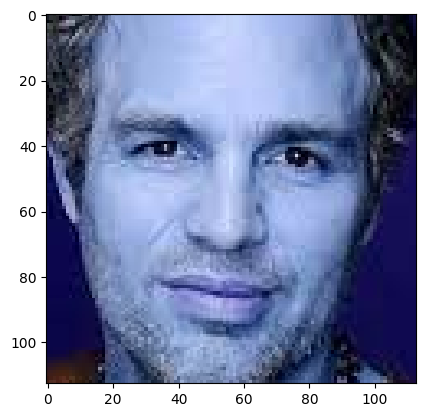

In [132]:
plt.imshow(image_array)

In [133]:

test_img=cv2.resize(image_array,(96, 96))
input_img1=test_img.reshape((1,96,96,3))
     

In [134]:

k=model.predict(input_img1)

1/1 [==============================] - 0s 321ms/step


In [147]:
files[int(round(k[0][0]))]

'mark_ruffalo'

In [157]:
testing2=cv2.imread('cropped_images\chris_hemsworth\chris_hemsworth7.png')

In [158]:
image_array2=np.array(testing2)/255.0

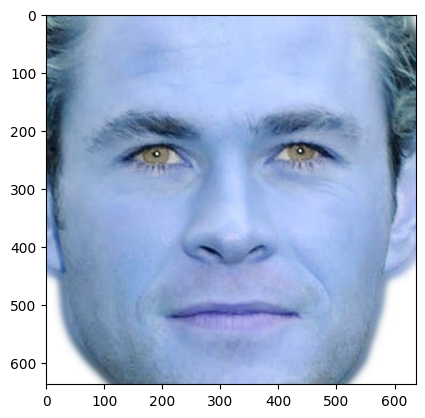

In [159]:
plt.imshow(image_array2)

In [160]:
test_img2=cv2.resize(image_array2,(96, 96))
input_img2=test_img2.reshape((1,96,96,3))

In [162]:
k2=model.predict(input_img2)

1/1 [==============================] - 0s 147ms/step


In [163]:
files[int(round(k2[0][0]))]

'chris_hemsworth'

### It is correctly recognizing the faces!